# Random walks on the spanning cluster

In this notebook we'll explore diffusion on the spanning cluster.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage
import tqdm

from generate_spanning_cluster import get_spanning_cluster
from percwalk import percwalk

In [2]:
sns.set(color_codes=True)

In [3]:
# Critical percolation probability
p_c = 0.59275

## Distance moved on the percolating cluster

We'll start by exploring diffusion on the percolating cluster for $p > p_c$. We'll measure the second moment of the average distance, $\langle R^2 \rangle$, as a function of the number of steps performed. Below we'll demonstrate what the diffusion on the percolating cluster looks like.

In [4]:
spanning_cluster = get_spanning_cluster(100, p_c)

Percolating cluster found


Having created a system with a percolating cluster, we start by visualizing the spanning cluster.

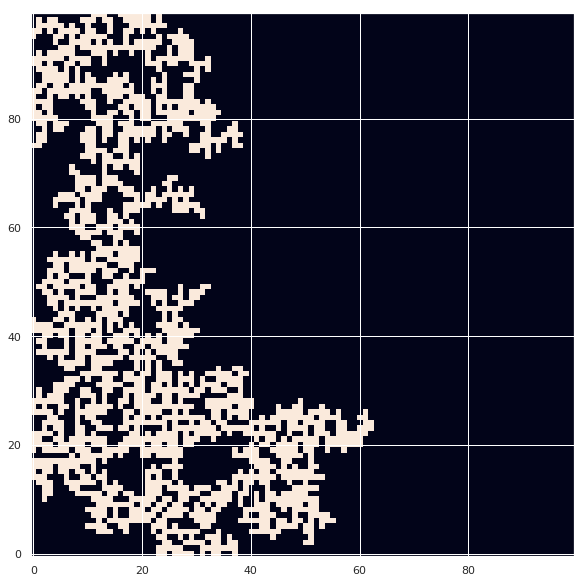

In [6]:
plt.figure(figsize=(14, 10))

plt.imshow(spanning_cluster, origin="lower")
plt.show()

Here we can see the sites contained in the percolating cluster. Moving on, we'll start a walker on a random site in the percolating cluster.

In [7]:
num_walks = int(1e5)
num_steps = 0

In [8]:
while num_steps <= 1:
    walker_map, displacements, num_steps = percwalk(spanning_cluster, num_walks)

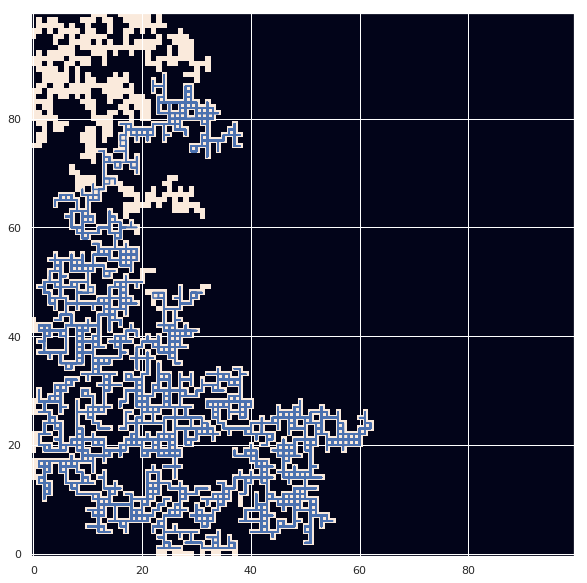

In [9]:
plt.figure(figsize=(14, 10))

plt.imshow(spanning_cluster, origin="lower")
# walker_map is oriented as row-column (ix, iy)
plt.plot(walker_map[1], walker_map[0])
plt.show()

In the above plot we can see how the walker moves in the spanning cluster. A thick line signifies several walks over a site. Next, we'll look at the squared distance, $\langle R^2 \rangle$, as a function of the number of walks, $N$, for varying $p > p_c$.

In [16]:
def get_squared_distance(L, p, num_walks, num_attempts=1000):
    spanning_cluster = get_spanning_cluster(L, p, num_attempts=num_attempts)
    num_steps = 0

    while num_steps <= 1:
        walker_map, displacements, num_steps = percwalk(spanning_cluster, num_walks)

    squared_distance = np.sum(displacements ** 2, axis=0)

    return squared_distance

In [20]:
L = 100
num_walks_arr = np.array([i * 1000 for i in range(1, 11)])
p_arr = np.linspace(p_c, 0.7, 11)

r_squared = np.zeros((len(num_walks_arr), len(p_arr)))

In [ ]:
for i, num_walks in tqdm.tqdm_notebook(enumerate(num_walks_arr), total=len(num_walks_arr)):
    for j, p in enumerate(p_arr):
        r_squared[i, j] = np.get_squared_distance